## Capital Asset Pricing Model (CAPM)
### Strength Training with Functions, Numpy


### University of Virginia
### DS 5100: Programming for Data Science
### Last Updated: March 18, 2021
---

### Objectives: 
- Use numpy and functions to compute a stock's CAPM beta
- Perform sensitivity analysis to understand how the data points impact the beta estimate

### Background


In finance, CAPM is a single-factor regression model used for explaining and predicting excess stock returns. There are better, more accurate models, but it has its uses. For example, the *market beta* is a useful output.


Here is the formula for calculating the expected excess return:

\begin{aligned} &E[R_i] - R_f  = \beta_i ( E[R_m] - R_f ) \\ \\ &\textbf{where:} \\ &ER_i = \text{expected return of stock i} \\ &R_f = \text{risk-free rate} \\ &\beta_i = \text{beta of the stock} \\ &ER_m - R_f = \text{market risk premium} \\ \end{aligned} 

#### Review the instructions below to complete the requested tasks.

#### TOTAL POINTS: 10
---  


In [12]:
# load modules
import numpy as np
import pandas as pd

# risk-free Treasury rate
R_f = 0.0175 / 252

In [13]:
# read in the market data
data = pd.read_csv('capm_market_data.csv')

Look at some records  
SPY is an ETF for the S&P 500 (the "stock market")  
AAPL is Apple  
The values are closing prices, adjusted for splits and dividends

In [14]:
#I like the format of the return / display better than the print statement
display(data.head(),data.tail())

,date,spy_adj_close,aapl_adj_close
0,2020-01-02,321.555786,298.829956
1,2020-01-03,319.120911,295.924713
2,2020-01-06,320.338379,298.282715
3,2020-01-07,319.437653,296.879883
4,2020-01-08,321.140106,301.655548


,date,spy_adj_close,aapl_adj_close
130,2020-07-09,314.380005,383.010010
131,2020-07-10,317.589996,383.679993
132,2020-07-13,314.839996,381.910004
133,2020-07-14,318.920013,388.230011
134,2020-07-15,321.850006,390.899994


Drop the date column

In [15]:
#just checking the column names again
#data.columns

#data now equals the old data but just selected columns
#data = data[['spy_adj_close', 'aapl_adj_close']]

#Copy so that I can delete without lossing data forever
df=data.copy()

del df['date']

df

,spy_adj_close,aapl_adj_close
0,321.555786,298.829956
1,319.120911,295.924713
2,320.338379,298.282715
3,319.437653,296.879883
4,321.140106,301.655548
...,...,...
130,314.380005,383.010010
131,317.589996,383.679993
132,314.839996,381.910004
133,318.920013,388.230011


Compute daily returns (percentage changes in price) for SPY, AAPL  
Be sure to drop the first row of NaN  
Hint: pandas has functions to easily do this

In [16]:
#playing around to see if i can do it without internet help 
#I did it, but there is a function for that 
'''
df['daily_returns_spy']=np.nan
for i in range(len(df.spy_adj_close)-1):
    x=df.spy_adj_close[i]
    y=df.spy_adj_close[i+1]
    z = ((y-x)/x)
    df.daily_returns_spy[i+1]=z
    

#data['daily_returns_spy']=[((data.spy_adj_close[i+1]-data.spy_adj_close[i])/data.spy_adj_close[i])*100 for i in range(len(data.spy_adj_close)-1) if i>=1]

df['daily_returns_aapl']=np.nan
for i in range(len(df.aapl_adj_close)-1):
    a=df.aapl_adj_close[i]
    b=df.aapl_adj_close[i+1]
    c = ((b-a)/a) 
    df.daily_returns_aapl[i+1]=c  
#drop first row with nan
df=df.dropna()
'''

#pct_change() does it for you- then drop the nan in 1st row
returns=df.pct_change(axis=0)

returns.dropna(inplace=True)


#### (1 PT) Print the first 5 rows of returns

In [17]:
#df[['daily_returns_spy','daily_returns_aapl']].head()
returns.head()

,spy_adj_close,aapl_adj_close
1,-0.007572,-0.009722
2,0.003815,0.007968
3,-0.002812,-0.004703
4,0.005330,0.016086
5,0.006781,0.021241


Save AAPL, SPY returns into separate numpy arrays  
#### (1 PT) Print the first five values from the SPY numpy array, and the AAPL numpy array

In [23]:
'''#save columns as individual arrays
spy_returns=df.daily_returns_spy.values
aapl_returns=df.daily_returns_aapl.values

#Print them with label so you know what they are
print('Spy Returns', spy_returns[:5])
print('\nAapl Returns', aapl_returns[:5])'''

#save columns as arrays
spy=returns.spy_adj_close.values
aapl=returns.aapl_adj_close.values

print('spy', spy[:5])
print('\naapl', aapl[:5])

#Can check to see if it is an array
#['column name'].values results in an array
type(spy)

spy [-0.00757217  0.00381507 -0.0028118   0.00532953  0.00678059]

aapl [-0.00972206  0.00796825 -0.00470303  0.01608619  0.02124092]


numpy.ndarray

##### Compute the excess returns of AAPL, SPY by simply subtracting the constant *R_f* from the returns.
##### Specifically, for the numpy array containing AAPL returns, subtract *R_f* from each of the returns. Repeat for SPY returns.

NOTE:  
AAPL - *R_f* = excess return of Apple stock  
SPY - *R_f* = excess return of stock market


In [25]:
'''#new arrays using line comprhension
spy_excess_returns=[s-R_f  for s in spy]

aapl_excess_returns=[a-R_f for a in aapl]'''

#subtract R_f from the spy and aapl
spy_xs = spy - R_f
aapl_xs=aapl - R_f

#take a look
display(spy_xs[:5],aapl_xs[:5])

array([-0.00764162,  0.00374562, -0.00288124,  0.00526009,  0.00671115])

array([-0.0097915 ,  0.0078988 , -0.00477247,  0.01601674,  0.02117147])

#### (1 PT) Print the LAST five excess returns from both AAPL, SPY numpy arrays


In [26]:
'''#print the last 5 returns with labels so I know what they are
print('spy_excess',spy_excess_returns[-5:])
print('\naapl_excess', aapl_excess_returns[-5:])'''

print('spy excess', spy_xs[-5:])
print('\naapl excss', aapl[-5:])

spy excess [-0.00576237  0.0101411  -0.00872841  0.01288957  0.00911779]

aapl excss [ 0.00430032  0.00174926 -0.00461319  0.01654842  0.00687732]


#### (1 PT) Make a scatterplot with SPY excess returns on x-axis, AAPL excess returns on y-axis####
Matplotlib documentation: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

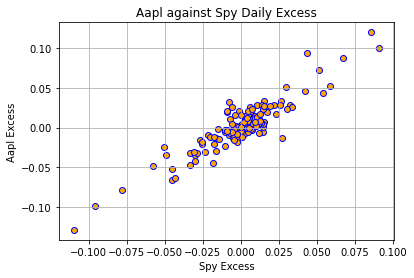

In [37]:
#import so you can use it
import matplotlib.pyplot as plt

#scatter plot x, y , color of dots, edge color is the outline
plt.scatter(spy_xs, aapl_xs, color='orange', edgecolor='blue')

#show a grid
plt.grid()

#label the axises and give title
plt.xlabel('Spy Excess')
plt.ylabel('Aapl Excess')
plt.title('Aapl against Spy Daily Excess')
#returns plot? avoids other returns? 
plt.show()

#### (3 PTS) Use Linear Algebra (matrices) to Compute the Regression Coefficient Estimate, \\(\hat\beta_i\\)

Hint 1: Here is the matrix formula where *x′* denotes transpose of *x*.

\begin{aligned} \hat\beta_i=(x′x)^{−1}x′y \end{aligned} 

Hint 2: consider numpy functions for matrix multiplication, transpose, and inverse. Be sure to review what these operations do, and how they work, if you're a bit rusty.

In [40]:
#beta_hat = np.matmul(np.matmul(np.linalg.inv(np.matmul(x.transpose(), x)), x.transpose()), y)[0][0]

#reshape arrays to column vectors <- forces them to a singel column
x=spy_xs.reshape(-1,1)
y=aapl_xs.reshape(-1,1)

#multiply x'x - matmul is the matrix multiplier function
xtransx = np.matmul(x.transpose(),x)

#inverse is in the lin alg in np
xtransxinv=np.linalg.inv(xtransx)

#mutilpy the inverse by x'
xtransxinvxtrans= np.matmul(xtransxinv, x.transpose())

#to find beta then muliply by y (comes out as 1x1 array)
beta= np.matmul(xtransxinvxtrans,y)

#extract as a single value
#beta_hat= np.matmul(xtransxinvxtrans,y)[0][0]
beta_hat = beta[0][0]
print(beta_hat)

1.08833170588181


You should have found that the beta estimate is greater than one.  
This means that the risk of AAPL stock, given the data, and according to this particular (flawed) model,  
is higher relative to the risk of the S&P 500.


#### Measuring Beta Sensitivity to Dropping Observations (Jackknifing)

Let's understand how sensitive the beta is to each data point.   
We want to drop each data point (one at a time), compute \\(\hat\beta_i\\) using our formula from above, and save each measurement.

#### (3 PTS) Write a function called `beta_sensitivity()` with these specs:

- take numpy arrays x and y as inputs
- output a list of tuples. each tuple contains (observation row dropped, beta estimate)

Hint: **np.delete(x, i).reshape(-1,1)** will delete observation i from array x, and make it a column vector

In [48]:
def beta_sensitivity(x,y):
    '''
    Purpose: Given to np arrays (x & y) as input, output list of tuples containing 
             observation row dropped and beta estimate
    
    INPUT:
    x      np array
    y      np array
    
    OUTPUT:
    out    list of tuples
    '''
    
    out = []
    #x.shape[0] gives the first term in the size of x
    #shape usually returns rows,columns so this will give # of rows in x
    sz = x.shape[0]
    
    
    for ix in range(sz):
        #this will delete observation i from array x, and make it a column vector
        xx = np.delete(x,ix).reshape(-1,1)
        yy=np.delete(y,ix).reshape(-1,1)
        #Calculate B hat using oneliner
        bi=np.matmul(np.matmul(np.linalg.inv(np.matmul(xx.transpose(), xx)), xx.transpose()), yy)[0][0]
        out.append((ix,bi))
    
    return out

#### Call `beta_sensitivity()` and print the first five tuples of output.

In [49]:
betas = beta_sensitivity(x, y)
betas[:5]

[(0, 1.0882175232839157),
 (1, 1.0881867249750736),
 (2, 1.0882839540700082),
 (3, 1.087783412511201),
 (4, 1.087388967419927)]